In [1]:
import pandas as pd
import missingno as msno
import gc
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns
import statistics as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from collections import defaultdict
from math import sqrt
import itertools
import pickle 
from imblearn.over_sampling import SMOTE

In [2]:
ds = pd.read_csv('E:\\Dataset\\dataset.csv')

C:\Users\Jack\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (14,15,16,17,19,40,141,142,143,144,145,146,147,148,149,150,151,152,184,193,220,221,245,273,283,284,344,370,375,381,432,447) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
val = {'Actual Going': 'UNKNWN'}
ds.fillna(value=val, inplace=True)
ds['Actual Going'].isna().any()

False

In [4]:
val = {'Going': 'UNKNWN'}
ds.fillna(value=val, inplace=True)
ds['Going'].isna().any()

False

In [5]:
val = {'Beginner': 'No', 'Maiden':'No','Novice':'No'}
ds.fillna(value=val, inplace=True)
ds['Beginner'].isna().any()


False

In [6]:
ds['Maiden'].isna().any()

False

In [7]:
ds['Novice'].isna().any()

False

In [8]:
val = {'Country': 'UK'}
ds.fillna(value=val, inplace=True)
ds['Country'].isna().any()

False

In [9]:
val = {'Auction': 'NonAuction'}
ds.fillna(value=val, inplace=True)
ds['Auction'].isna().any()

False

In [10]:
val = {'Gender': '-'}
ds.fillna(value=val, inplace=True)
ds['Gender'].isna().any()

False

In [11]:
val = {'Going2RunsAgo': 'unknown','Going3RunsAgo': 'unknown','Going4RunsAgo': 'unknown','Going5RunsAgo': 'unknown','GoingLastTime': 'unknown'}
ds.fillna(value=val, inplace=True)
ds['Going2RunsAgo'].isna().any()

False

In [12]:
ds['Going3RunsAgo'].isna().any()

False

In [13]:
ds['Going4RunsAgo'].isna().any()

False

In [14]:
ds['Going5RunsAgo'].isna().any()

False

In [15]:
ds['GoingLastTime'].isna().any()

False

In [16]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.', 'Claiming',
       'ClassDifferentialOneRace', 'ClsRanking', 'ConnRanking', 'Dam',
       'FrmRanking', 'Handicap', 'HorseForm', 'HunterChase', 'Jockey',
       'JockeyRanking', 'LastTimeClassDrop', 'LastTimePositionRaceType',
       'LastTimePosn', 'LastTimeWeightDrop', 'LengthsWonLost2RunsAgo',
       'LengthsWonLost3RunsAgo', 'LengthsWonLost4RunsAgo',
       'LengthsWonLost5RunsAgo', 'LengthsWonLostLastRun', 'LstRanking',
       'Position2RunsAgo', 'Position3RunsAgo', 'Position4RunsAgo',
       'Position5RunsAgo', 'PositionLastTime', 'Prize', 'RAdjRanking',
       'RawRanking', 'S.P.', 'Selling', 'Sire', 'SpdRanking', 'StallNumber',
       'StallPercentage', 'Systems', 'TJCPL', 'TJCROI', 'TJCRuns', 'TJCSR',
       'TJCTypePL', 'TJCTypeROI', 'TJCTypeRuns', 'TJCTypeSR', 'TJCTypeWins',
       'TJCWins', 'TJPL', 'TJROI', 'TJRuns', 'TJSR', 'TJWins', 'TrFormRankin

In [17]:
val = {'Handicap': 'NonHandicap'}
ds.fillna(value=val, inplace=True)
ds['Handicap'].isna().any()

False

In [18]:
val = {'Selling': 'NonSelling'}
ds.fillna(value=val, inplace=True)
ds['Selling'].isna().any()

False

In [19]:
ds.drop(columns=['WRITE_IN_DURATION_HERE', 'WRITE_FAVOURITE_RANKING','ValueOdds_BetfairFormat'], inplace=True)


In [20]:
val = {'Jockey': 'unknown'}
ds.fillna(value=val, inplace=True)
ds['Jockey'].isna().any()

False

In [21]:
val = {'Dam': 'UNKNOWN','Sire': 'UNKNOWN'}
ds.fillna(value=val, inplace=True)
ds['Dam'].isna().any()

False

In [22]:
ds['Sire'].isna().any()

False

In [23]:
val = {'Wearing': '0'}
ds.fillna(value=val, inplace=True)
ds['Wearing'].isna().any()

False

In [24]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.', 'Claiming',
       'ClassDifferentialOneRace', 'ClsRanking', 'ConnRanking', 'FrmRanking',
       'HorseForm', 'HunterChase', 'JockeyRanking', 'LastTimeClassDrop',
       'LastTimePositionRaceType', 'LastTimePosn', 'LastTimeWeightDrop',
       'LengthsWonLost2RunsAgo', 'LengthsWonLost3RunsAgo',
       'LengthsWonLost4RunsAgo', 'LengthsWonLost5RunsAgo',
       'LengthsWonLostLastRun', 'LstRanking', 'Position2RunsAgo',
       'Position3RunsAgo', 'Position4RunsAgo', 'Position5RunsAgo',
       'PositionLastTime', 'Prize', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'StallNumber', 'StallPercentage', 'Systems', 'TJCPL',
       'TJCROI', 'TJCRuns', 'TJCSR', 'TJCTypePL', 'TJCTypeROI', 'TJCTypeRuns',
       'TJCTypeSR', 'TJCTypeWins', 'TJCWins', 'TJPL', 'TJROI', 'TJRuns',
       'TJSR', 'TJWins', 'TrFormRanking', 'Trainer', 'TrainerCalendarRuns',
       'Tr

In [25]:
val = {'Claiming': 'NotClaiming'}
ds.fillna(value=val, inplace=True)
ds['Claiming'].isna().any()

False

In [26]:
ds.drop(columns=['ClassDifferentialOneRace'], inplace=True)

In [27]:
val = {'ClsRanking': 0}
ds.fillna(value=val, inplace=True)
ds['ClsRanking'].isna().any()

False

In [28]:
val = {'Position2RunsAgo': 0, 'Position3RunsAgo':0, 'Position4RunsAgo':0,
       'Position5RunsAgo': 0, 'PositionLastTime':0,}
ds.fillna(value = val, inplace=True)

In [29]:
val = {'HunterChase': 'No'}
ds.fillna(value=val, inplace=True)
ds['HunterChase'].isna().any()

False

In [30]:
val = {'FrmRanking': 0}
ds.fillna(value=val, inplace=True)
ds['FrmRanking'].isna().any()

False

In [31]:
val = {'ConnRanking': 0}
ds.fillna(value=val, inplace=True)
ds['ConnRanking'].isna().any()

False

In [32]:
val = {'HorseForm': '0'}
ds.fillna(value=val, inplace=True)
ds['HorseForm'].isna().any()

False

In [33]:
val = {'StallNumber': 0}
ds.fillna(value=val, inplace=True)
ds['StallNumber'].isna().any()

False

In [34]:
val = {'JockeyRanking': 0, 'TrainerRanking':0}
ds.fillna(value=val, inplace=True)

In [35]:
val = {'Trainer': 'UNKNWN'}
ds.fillna(value=val,inplace=True)

In [36]:
val = {'StallPercentage': '0%'}
ds.fillna(value=val, inplace=True)
ds['StallPercentage'].isna().any()

False

In [37]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LengthsWonLost2RunsAgo',
       'LengthsWonLost3RunsAgo', 'LengthsWonLost4RunsAgo',
       'LengthsWonLost5RunsAgo', 'LengthsWonLostLastRun', 'LstRanking',
       'Prize', 'RAdjRanking', 'RawRanking', 'S.P.', 'SpdRanking', 'Systems',
       'TJCPL', 'TJCROI', 'TJCRuns', 'TJCSR', 'TJCTypePL', 'TJCTypeROI',
       'TJCTypeRuns', 'TJCTypeSR', 'TJCTypeWins', 'TJCWins', 'TJPL', 'TJROI',
       'TJRuns', 'TJSR', 'TJWins', 'TrFormRanking', 'TrainerCalendarRuns',
       'WeightDifferentialOneRace', 'WinFRanking'],
      dtype='object')

In [38]:
val = {'Prize': 0}
ds.fillna(value=val, inplace=True)
ds['Prize'].isna().any()

False

In [39]:
val = { 'LengthsWonLost2RunsAgo':0,
       'LengthsWonLost3RunsAgo':0, 'LengthsWonLost4RunsAgo':0,
       'LengthsWonLost5RunsAgo':0, 'LengthsWonLostLastRun':0,}
ds.fillna(value=val,inplace=True)

In [40]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LstRanking', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'Systems', 'TJCPL', 'TJCROI', 'TJCRuns', 'TJCSR',
       'TJCTypePL', 'TJCTypeROI', 'TJCTypeRuns', 'TJCTypeSR', 'TJCTypeWins',
       'TJCWins', 'TJPL', 'TJROI', 'TJRuns', 'TJSR', 'TJWins', 'TrFormRanking',
       'TrainerCalendarRuns', 'WeightDifferentialOneRace', 'WinFRanking'],
      dtype='object')

In [41]:
val = { 'TJCPL':0, 'TJCROI':0, 'TJCRuns':0, 'TJCSR':0,
       'TJCTypePL':0, 'TJCTypeROI':0, 'TJCTypeRuns':0, 'TJCTypeSR':0, 'TJCTypeWins':0,
       'TJCWins':0, 'TJPL':0, 'TJROI':0, 'TJRuns':0, 'TJSR':0, 'TJWins':0}
ds.fillna(value=val,inplace=True)

In [42]:
ds.columns[ds.isnull().any()]

Index(['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LstRanking', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'Systems', 'TrFormRanking', 'TrainerCalendarRuns',
       'WeightDifferentialOneRace', 'WinFRanking'],
      dtype='object')

In [43]:
ds.drop(columns=['BHAclassLast', 'BHAclassLastType', 'BHAclassToday',
       'Betfair Place S.P.', 'Betfair Placed', 'Betfair Win S.P.',
       'LastTimeClassDrop', 'LastTimePositionRaceType', 'LastTimePosn',
       'LastTimeWeightDrop', 'LstRanking', 'RAdjRanking', 'RawRanking', 'S.P.',
       'SpdRanking', 'Systems', 'TrFormRanking', 'TrainerCalendarRuns',
       'WeightDifferentialOneRace', 'WinFRanking'], inplace=True)

In [44]:
for index,row in ds.iterrows():
    label = row['Result']
    if label != '1':
        newLabel = '0' 
        ds.at[index, 'Result'] = newLabel

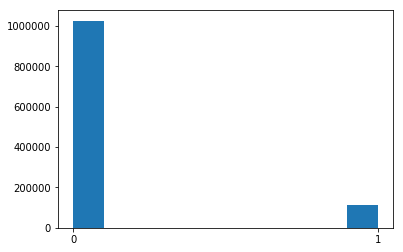

In [45]:
Winners= plt.figure()
ax = Winners.add_subplot(1,1,1)
ax.hist(ds['Result'])
plt.show()

In [ ]:

# for col in X_test.columns.values:
#     if X_test[col].dtypes=='object':
#         print("%a" %col)

In [ ]:
# file = open('data.txt','w')
# for col in X_test.columns.values:
#     file.write("%a," %col)

# file.close

In [45]:
X = ds[[' Duration',' LengthsBehind',' LengthsBehindTotal',' UKHR_CourseID',' UKHR_EntryID',' UKHR_HorseID',' UKHR_JockeyID',' UKHR_TrainerID','Actual Going','Actual Runners','Age','Alarms','Allowances','Auction','BST_GMT','Beginner','BetFairSPForecastPlacePrice','BetFairSPForecastWinPrice','BetterClassWeightWin','BetterClassWeightWinDaysAgo','BetterClassWeightWinRacesAgo','BetterClassWeightWinType','BetterClassWeightWinTypeDaysAgo','BetterClassWeightWinTypeRacesAgo','BetterClassWin','BetterClassWinDaysAgo','BetterClassWinRacesAgo','BetterClassWinType','BetterClassWinTypeDaysAgo','BetterClassWinTypeRacesAgo','CSVversion','CardNumber','ChaseJumpingAbility','Claiming','Class','ClassDiffAverage','ClassDiffAverage1Year','ClassDiffDifference','ClassDiffDifference1Year','ClassDiffRuns','ClassDiffRuns1Year','ClassDiffTotal','ClassDiffTotal1Year','ClassDiffWinsAverage','ClassDiffWinsAverage1Year','ClassDiffWinsDifference','ClassDiffWinsDifference1Year','ClassDiffWinsRuns','ClassDiffWinsRuns1Year','ClassDiffWinsTotal','ClassDiffWinsTotal1Year','ClassPosition','ClassWeightDiffAverage','ClassWeightDiffAverage1Year','ClassWeightDiffDifference','ClassWeightDiffDifference1Year','ClassWeightDiffRuns','ClassWeightDiffRuns1Year','ClassWeightDiffTotal','ClassWeightDiffTotal1Year','ClassWeightDiffWinsAverage','ClassWeightDiffWinsAverage1Year','ClassWeightDiffWinsDifference','ClassWeightDiffWinsDifference1Year','ClassWeightDiffWinsRuns','ClassWeightDiffWinsRuns1Year','ClassWeightDiffWinsTotal','ClassWeightDiffWinsTotal1Year','ClsAdvantage','ClsRanking','ConnAdvantage','ConnRanking','ConnectionsRating','Country','CourseWins','Dam','Dam_AdjacentGoing_AE','Dam_AdjacentGoing_PL','Dam_AdjacentGoing_ROI','Dam_AdjacentGoing_Run','Dam_AdjacentGoing_SR','Dam_AdjacentGoing_Win','Dam_Age_AE','Dam_Age_PL','Dam_Age_ROI','Dam_Age_Run','Dam_Age_SR','Dam_Age_Win','Dam_All_AE','Dam_All_PL','Dam_All_ROI','Dam_All_Run','Dam_All_SR','Dam_All_Win','Dam_DistanceRange_AE','Dam_DistanceRange_PL','Dam_DistanceRange_ROI','Dam_DistanceRange_Run','Dam_DistanceRange_SR','Dam_DistanceRange_Win','Dam_Distance_AE','Dam_Distance_PL','Dam_Distance_ROI','Dam_Distance_Run','Dam_Distance_SR','Dam_Distance_Win','Dam_GoingDistance_AE','Dam_GoingDistance_PL','Dam_GoingDistance_ROI','Dam_GoingDistance_Run','Dam_GoingDistance_Win','Dam_Going_AE','Dam_Going_Distance_SR','Dam_Going_PL','Dam_Going_ROI','Dam_Going_Run','Dam_Going_SR','Dam_Going_Win','Dam_RaceClass_AE','Dam_RaceClass_PL','Dam_RaceClass_ROI','Dam_RaceClass_Run','Dam_RaceClass_SR','Dam_RaceClass_Win','Dam_RaceType_AE','Dam_RaceType_PL','Dam_RaceType_ROI','Dam_RaceType_Run','Dam_RaceType_SR','Dam_RaceType_Win','Date','DaysSinceLastRun','DaysSincePreviousTrainerWin','DifferentialRankingClass1Year','DifferentialRankingClass1YearWins','DifferentialRankingClass5Years','DifferentialRankingClass5YearsWins','DifferentialRankingClassWeight1Year','DifferentialRankingClassWeight1YearWins','DifferentialRankingClassWeight5Years','DifferentialRankingClassWeight5YearsWins','DifferentialRankingWeight1Year','DifferentialRankingWeight1YearWins','DifferentialRankingWeight5Years','DifferentialRankingWeight5YearsWins','Distance2RunsAgo','Distance3RunsAgo','Distance4RunsAgo','Distance5RunsAgo','DistanceLastTime','DistanceRegression','DistanceRuns','DistanceWins','ElapsedDays','FCPAdvantage','ForecastSP','FormLastRun','FormTrend','FrmAdvantage','FrmRanking','Furlongs','Gender','Going','Going2RunsAgo','Going3RunsAgo','Going4RunsAgo','Going5RunsAgo','GoingLastTime','GoingRegression','GoingRuns','GoingWins','HCPAdvantage','HCPRanking','Handicap','Horse','HorseForm','HunterChase','JCPL','JCROI','JCRuns','JCSR','JCWins','Jockey','JockeyAdvantage','JockeyRanking','JockeyRating','JumpAdvantage','KouldsScore_Age_Dam','KouldsScore_Age_Sire','KouldsScore_All_Dam','KouldsScore_All_Sire','KouldsScore_Distance20pc_Dam','KouldsScore_Distance20pc_Sire','KouldsScore_Distance_Dam','KouldsScore_Distance_Sire','KouldsScore_GoingBand_Dam','KouldsScore_GoingBand_Sire','KouldsScore_GoingDistance_Dam','KouldsScore_GoingDistance_Sire','KouldsScore_Going_Dam','KouldsScore_Going_Sire','KouldsScore_RaceClass_Dam','KouldsScore_RaceClass_Sire','KouldsScore_RaceType_Dam','KouldsScore_RaceType_Sire','KouldsScore_Total','LastClassDropRank','LastRaceRatingRank','LastTimeDistanceChange','LastTimeJockeyChange','LastTimeLengths','LastTimeTrainerChange','LengthsWonLost2RunsAgo','LengthsWonLost3RunsAgo','LengthsWonLost4RunsAgo','LengthsWonLost5RunsAgo','LengthsWonLostLastRun','LstAdvantage','Maiden','MaxAge','MeanWeight','Meeting','MinAge','Novice','NumberOfResults','Penalties','PlacePositions','Position2RunsAgo','Position3RunsAgo','Position4RunsAgo','Position5RunsAgo','PositionLastTime','Prize','RAdj Advantage','RDistanceRanking','RGoingRanking','Race1RunAgo','Race1RunAgoRaceClass','Race1RunAgoRaceClassType','Race1RunAgoRaceType','Race2RunsAgo','Race2RunsAgoRaceClass','Race2RunsAgoRaceClassType','Race2RunsAgoRaceType','Race3RunsAgo','Race3RunsAgoRaceClass','Race3RunsAgoRaceClassType','Race3RunsAgoRaceType','Race4RunsAgo','Race4RunsAgoRaceClass','Race4RunsAgoRaceClassType','Race4RunsAgoRaceType','Race5RunsAgo','Race5RunsAgoRaceClass','Race5RunsAgoRaceClassType','Race5RunsAgoRaceType','RaceClass','RaceType','RacesSincePreviousTrainerWin','Rating','RatingAdvantage','RatingsPosition','Raw Advantage','RawAdjustedForAgeAndWeight','RawRating','RecentWins','Runners','Selling','Sire','Sire_AdjacentGoing_AE','Sire_AdjacentGoing_PL','Sire_AdjacentGoing_ROI','Sire_AdjacentGoing_Run','Sire_AdjacentGoing_SR','Sire_AdjacentGoing_Win','Sire_Age_AE','Sire_Age_PL','Sire_Age_ROI','Sire_Age_Run','Sire_Age_SR','Sire_Age_Win','Sire_All_AE','Sire_All_PL','Sire_All_ROI','Sire_All_Run','Sire_All_SR','Sire_All_Win','Sire_DistanceRange_AE','Sire_DistanceRange_PL','Sire_DistanceRange_ROI','Sire_DistanceRange_Run','Sire_DistanceRange_SR','Sire_DistanceRange_Win','Sire_Distance_AE','Sire_Distance_PL','Sire_Distance_ROI','Sire_Distance_Run','Sire_Distance_SR','Sire_Distance_Win','Sire_GoingDistance_AE','Sire_GoingDistance_PL','Sire_GoingDistance_ROI','Sire_GoingDistance_Run','Sire_GoingDistance_SR','Sire_GoingDistance_Win','Sire_Going_AE','Sire_Going_PL','Sire_Going_ROI','Sire_Going_Run','Sire_Going_SR','Sire_Going_Win','Sire_RaceClass_AE','Sire_RaceClass_PL','Sire_RaceClass_ROI','Sire_RaceClass_Run','Sire_RaceClass_SR','Sire_RaceClass_Win','Sire_RaceType_AE','Sire_RaceType_PL','Sire_RaceType_ROI','Sire_RaceType_Run','Sire_RaceType_SR','Sire_RaceType_Win','SpdAdvantage','Speed','SpeedAdvantage','SpeedRating','SpeedRatingRank','StallNumber','StallPercentage','TCPL','TCROI','TCRuns','TCSR','TCWins','TJCPL','TJCROI','TJCRuns','TJCSR','TJCTypePL','TJCTypeROI','TJCTypeRuns','TJCTypeSR','TJCTypeWins','TJCWins','TJPL','TJROI','TJRuns','TJSR','TJWins','TRF02WeeksPL','TRF02WeeksROI','TRF02WeeksRuns','TRF02WeeksSR','TRF02WeeksWins','TRF04WeeksPL','TRF04WeeksROI','TRF04WeeksRuns','TRF04WeeksSR','TRF04WeeksWins','TRF20RunsDays','TRF20RunsPL','TRF20RunsROI','TRF20RunsRuns','TRF20RunsSR','TRF20RunsWins','Time','Time24Hour','Title','TotalWins','TrForm10RunsAgo','TrForm2RunsAgo','TrForm3RunsAgo','TrForm4RunsAgo','TrForm5RunsAgo','TrForm6RunsAgo','TrForm7RunsAgo','TrForm8RunsAgo','TrForm9RunsAgo','TrFormAdvantage','TrFormLastRun','Trainer','Trainer5YearPL','Trainer5YearROI','Trainer5YearReturn','Trainer5YearRuns','Trainer5YearSR','Trainer5YearWins','Trainer7DaysPL','Trainer7DaysROI','Trainer7DaysSR','Trainer7DaysWins','TrainerAdvantage','TrainerCalendarPL','TrainerCalendarROI','TrainerCalendarReturn','TrainerCalendarSR','TrainerCalendarWins','TrainerDaysRuns','TrainerForm','TrainerLast10RunsPL','TrainerLast10RunsROI','TrainerLast10RunsRuns','TrainerLast10RunsSR','TrainerLast10RunsWins','TrainerLast40RunsPL','TrainerLast40RunsROI','TrainerLast40RunsRuns','TrainerLast40RunsSR','TrainerLast40RunsWins','TrainerRanking','TrainerRating','UKHRCardCourseID','UKHRCardHorseID','UKHRCardJockeyID','UKHRCardRaceID','UKHRCardTrainerID','UKHR_DamID','UKHR_RaceID','UKHR_SireID','ValueOdds','ValueOdds_Probability','ValuePlaceOdds','Wearing','WeightDelta','WeightDiffAverage','WeightDiffAverage1Year','WeightDiffDifference','WeightDiffDifference1Year']]
y = ds['Result']

In [46]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.1,)

In [47]:
del X
del y

In [48]:
le=LabelEncoder()
for col in X_validate.columns.values:
    if X_validate[col].dtypes=='object':
        data=X_train[col].append(X_validate[col])
        le.fit(data.values.astype(str))
        X_train[col]=le.transform(X_train[col].astype(str))
        X_validate[col]=le.transform(X_validate[col].astype(str))

In [49]:
del ds

In [61]:
gc.collect()

4578

In [51]:
sm = SMOTE()
X_smote, y_train_smote = sm.fit_sample(X_train,y_train)

In [64]:
del X_train
del y_train

In [53]:
norm_X_train = normalize(X_smote)
norm_X_test = normalize(X_validate)

In [54]:
del X_smote
del X_validate

In [65]:
mlp = MLPClassifier()
kf = KFold(n_splits=10, shuffle=False, random_state=None) 
count = 0 
for train_index, test_index in kf.split(norm_X_train):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = norm_X_train[train_index], norm_X_train[test_index] 
    y_train, y_test = y_train_smote[train_index], y_train_smote[test_index]
    mlp.fit(X_train, y_train)
    print("trained on fold {0}".format(count))
    pickle.dump(mlp, open("kfoldtrain{0}.sav".format(count),'wb'))
    prediction = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(classification_report(y_test, prediction))
    print(accuracy)
    
    count += 1 

Train: [ 184569  184570  184571 ... 1845679 1845680 1845681] Validation: [     0      1      2 ... 184566 184567 184568]
trained on fold 0
             precision    recall  f1-score   support

          0       0.94      0.86      0.90    166459
          1       0.27      0.50      0.35     18110

avg / total       0.87      0.82      0.84    184569

0.8202569228852082
Train: [      0       1       2 ... 1845679 1845680 1845681] Validation: [184569 184570 184571 ... 369135 369136 369137]
trained on fold 1
             precision    recall  f1-score   support

          0       0.95      0.79      0.86    166143
          1       0.24      0.59      0.34     18426

avg / total       0.87      0.77      0.81    184569

0.7663096186250129
Train: [      0       1       2 ... 1845679 1845680 1845681] Validation: [369138 369139 369140 ... 553703 553704 553705]
trained on fold 2
             precision    recall  f1-score   support

          0       0.95      0.78      0.85    166214
        

C:\Users\Jack\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.93      0.96    184568

avg / total       1.00      0.93      0.96    184568

0.9284599713926575
Train: [      0       1       2 ... 1845679 1845680 1845681] Validation: [1291978 1291979 1291980 ... 1476543 1476544 1476545]
trained on fold 7
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.82      0.90    184568

avg / total       1.00      0.82      0.90    184568

0.8164145464002427
Train: [      0       1       2 ... 1845679 1845680 1845681] Validation: [1476546 1476547 1476548 ... 1661111 1661112 1661113]
trained on fold 8
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.75      0.86    184568

avg / total       1.00      0.75      0.86    184568

0.7529365870573447
Train: [

In [66]:
filename = "TrainedModel4.sav"
pickle.dump(mlp, open(filename, 'wb'))

In [67]:
loaded_mlp = pickle.load(open(filename, 'rb'))

In [68]:
prediction = loaded_mlp.predict(norm_X_test)

In [69]:
accuracy = accuracy_score(y_validate, prediction)
print ("validating model")
print(classification_report(y_validate, prediction))
print(accuracy)

validating model
             precision    recall  f1-score   support

          0       0.92      0.95      0.94    102535
          1       0.37      0.27      0.31     11252

avg / total       0.87      0.88      0.87    113787

0.8822097427649908


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

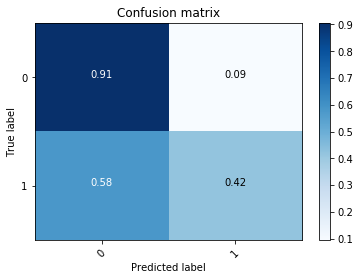

In [68]:
ClassNames = ['0', '1']
def plot_confusion_matrix(cm, classes, normalize=True):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusionMatrix.png')
    plt.show()
    

cmPlot = confusion_matrix(y_validate, prediction)
plot_confusion_matrix(cmPlot, classes= ClassNames, normalize=True)
